In [1]:
%matplotlib inline
import sys
sys.path.append('..')
from preamble import *

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

print("Data shape: {}".format(X.shape))
print("Target shape: {}".format(y.shape))

print()

# we rename the classes "blue" and "red" for illustration bpurposes:
y_named = np.array(["blue", "red"])[y]
print("Named Target shape: {}".format(y_named.shape))
print(y[0], y_named[0])
print(y[1], y_named[1])
print(y[2], y_named[2])

Data shape: (100, 2)
Target shape: (100,)

Named Target shape: (100,)
1 red
1 red
0 blue


In [3]:
# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [4]:
print("X_test.shape: {}".format(X_test.shape))

print()

print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))

print()

print("Decision function:\n{}".format(gbrt.decision_function(X_test)))

X_test.shape: (25, 2)

Decision function shape: (25,)

Decision function:
[ 4.136 -1.702 -3.951 -3.626  4.29   3.662 -7.691  4.11   1.108  3.408
 -6.463  4.29   3.902 -1.2    3.662 -4.172 -1.23  -3.916  4.036  4.11
  4.11   0.657  2.698 -2.657 -1.868]


In [5]:
print("Thresholded decision function:\n{}".format(gbrt.decision_function(X_test) > 0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [6]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
print(greater_zero)
print()

# use 0 and 1 as indices into classes_
print(gbrt.classes_)
pred = gbrt.classes_[greater_zero]

print(pred)

print()

# pred is the same as the output of gbrt.predict
print("pred is equal to predictions: {}".format(np.all(pred == gbrt.predict(X_test))))

[1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0]

['blue' 'red']
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']

pred is equal to predictions: True


In [7]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29


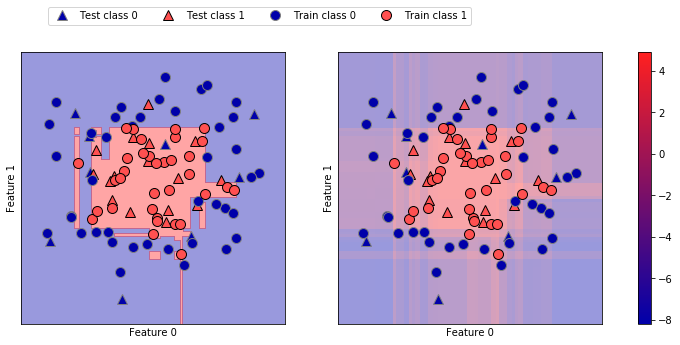

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))